In [ ]:
!pip install numpy opencv-python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Temporal Processing


<ipython-input-15-afdc2ab2eb1a>:27: RuntimeWarning: overflow encountered in scalar add
  result[i][j] = min(img1[i][j] + img2[i][j], 255)  # Ensure pixel values do not exceed 255
<ipython-input-15-afdc2ab2eb1a>:37: RuntimeWarning: overflow encountered in scalar subtract
  result[i][j] = max(img1[i][j] - img2[i][j], 0)  # Ensure pixel values do not go below 0
<ipython-input-15-afdc2ab2eb1a>:48: RuntimeWarning: overflow encountered in scalar multiply
  result[i][j] = min((img1[i][j] * img2[i][j]) // 255, 255)  # Scale product to valid pixel range
<ipython-input-15-afdc2ab2eb1a>:58: RuntimeWarning: overflow encountered in scalar add
  result[i][j] = (img1[i][j] + img2[i][j]) // 2  # Simple averaging


Original Image


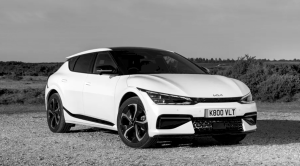

Addition Result


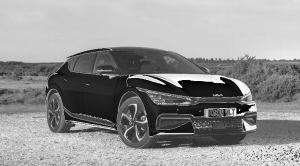

Subtraction Result


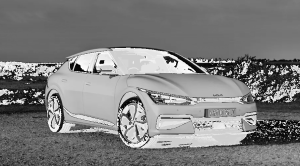

Multiplication Result


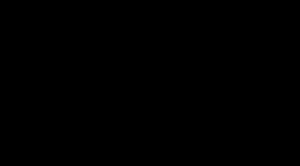

Averaging Result


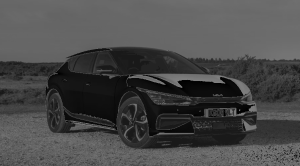

AND Result


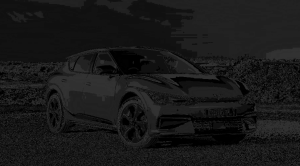

OR Result


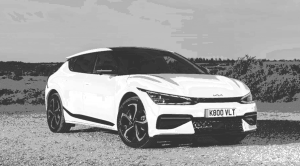

XOR Result


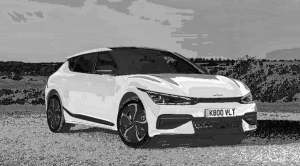

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load an example image
image = cv2.imread('/content/drive/MyDrive/CART.png', cv2.IMREAD_GRAYSCALE)

# Ensure the image is loaded
if image is None:
    print("Error: Could not load the image. Check the file path.")
    exit()

# Create a simple pattern (second signal/image) for manipulation
pattern_image = np.full(image.shape, 50, dtype=np.uint8)  # A constant gray image for example

# Convert the loaded image to a 2D list for processing
gray_image = [[image[i, j] for j in range(image.shape[1])] for i in range(image.shape[0])]
pattern_image_list = [[pattern_image[i, j] for j in range(pattern_image.shape[1])] for i in range(pattern_image.shape[0])]

# Function to add two images
def add_images(img1, img2):
    rows = len(img1)
    cols = len(img1[0])
    result = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i][j] = min(img1[i][j] + img2[i][j], 255)  # Ensure pixel values do not exceed 255
    return result

# Function to subtract two images
def subtract_images(img1, img2):
    rows = len(img1)
    cols = len(img1[0])
    result = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i][j] = max(img1[i][j] - img2[i][j], 0)  # Ensure pixel values do not go below 0
    return result

# Function to multiply two images
def multiply_images(img1, img2):
    rows = len(img1)
    cols = len(img1[0])
    result = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            # Scale the multiplication and ensure values stay in range
            result[i][j] = min((img1[i][j] * img2[i][j]) // 255, 255)  # Scale product to valid pixel range
    return result

# Function to average two images
def average_images(img1, img2):
    rows = len(img1)
    cols = len(img1[0])
    result = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i][j] = (img1[i][j] + img2[i][j]) // 2  # Simple averaging
    return result

# Function for AND operation
def and_images(img1, img2):
    rows = len(img1)
    cols = len(img1[0])
    result = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i][j] = img1[i][j] & img2[i][j]  # Bitwise AND
    return result

# Function for OR operation
def or_images(img1, img2):
    rows = len(img1)
    cols = len(img1[0])
    result = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i][j] = img1[i][j] | img2[i][j]  # Bitwise OR
    return result

# Function for XOR operation
def xor_images(img1, img2):
    rows = len(img1)
    cols = len(img1[0])
    result = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i][j] = img1[i][j] ^ img2[i][j]  # Bitwise XOR
    return result

# Resize function to reduce image dimensions
def resize_image(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

# Apply temporal operations
addition_result = add_images(gray_image, pattern_image_list)
subtraction_result = subtract_images(gray_image, pattern_image_list)
multiplication_result = multiply_images(gray_image, pattern_image_list)
averaging_result = average_images(gray_image, pattern_image_list)
and_result = and_images(gray_image, pattern_image_list)
or_result = or_images(gray_image, pattern_image_list)
xor_result = xor_images(gray_image, pattern_image_list)

# Convert results to numpy arrays for display
results = [
    (image, "Original Image"),
    (np.array(addition_result, dtype=np.uint8), "Addition Result"),
    (np.array(subtraction_result, dtype=np.uint8), "Subtraction Result"),
    (np.array(multiplication_result, dtype=np.uint8), "Multiplication Result"),
    (np.array(averaging_result, dtype=np.uint8), "Averaging Result"),
    (np.array(and_result, dtype=np.uint8), "AND Result"),
    (np.array(or_result, dtype=np.uint8), "OR Result"),
    (np.array(xor_result, dtype=np.uint8), "XOR Result")
]

def resize_image_auto_height(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]  # Width / Height
    height = int(width / aspect_ratio)  # Calculate new height maintaining aspect ratio
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

# Display results with width 300 and auto height
for img, title in results:
    resized_img = resize_image_auto_height(img, 300)  # Resize to 300 pixels width
    print(title)
    cv2_imshow(resized_img)

# Geometric Processing


Original Image


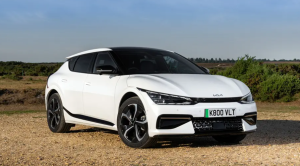

Cropped Image


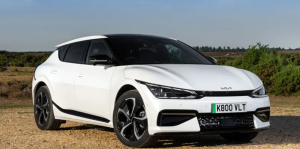

Rotated Image (45°)


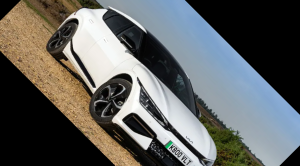

Flipped Image (Horizontal)


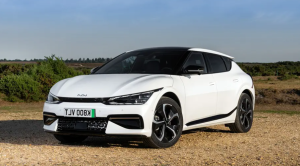

Flipped Image (Vertical)


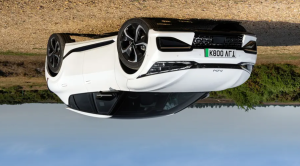

Zoomed Image (50%)


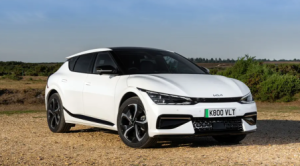

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image as a NumPy array (substitute the image path with your own)
image = cv2.imread('/content/drive/MyDrive/CART.png')

# Ensure the image is loaded
if image is None or image.size == 0:
    raise ValueError("Error: Could not load the image. Check the file path.")

# Resize the image to a specific width while maintaining aspect ratio
def resize_image(img, target_width):
    if img is None or img.size == 0:
        raise ValueError("Input image is empty or invalid.")
    original_height, original_width = img.shape[:2]
    if original_height == 0 or original_width == 0:
        raise ValueError("Image dimensions are zero. Cannot resize.")
    aspect_ratio = original_width / original_height
    target_height = int(target_width / aspect_ratio)
    resized_img = cv2.resize(img, (target_width, target_height), interpolation=cv2.INTER_AREA)
    return resized_img

# Crop the image with a specified margin
def crop_image(img, crop_margin):
    if img is None or img.size == 0:
        raise ValueError("Input image is empty or invalid.")
    height, width = img.shape[:2]
    if height <= 2 * crop_margin or width <= 2 * crop_margin:
        raise ValueError("Crop margin is too large for the image dimensions.")
    return img[crop_margin:height - crop_margin, crop_margin:width - crop_margin]

# Rotate the image by a specified angle
def rotate_image(img, angle):
    if img is None or img.size == 0:
        raise ValueError("Input image is empty or invalid.")
    radians = np.deg2rad(angle)
    height, width = img.shape[:2]
    center_y, center_x = height // 2, width // 2
    rotated_img = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            y = int((i - center_y) * np.cos(radians) - (j - center_x) * np.sin(radians) + center_y)
            x = int((i - center_y) * np.sin(radians) + (j - center_x) * np.cos(radians) + center_x)
            if 0 <= y < height and 0 <= x < width:
                rotated_img[i, j] = img[y, x]
    return rotated_img

# Flip the image horizontally or vertically without OpenCV functions
def flip_image(img, direction):
    if img is None or img.size == 0:
        raise ValueError("Input image is empty or invalid.")
    height, width = img.shape[:2]
    flipped_img = np.zeros_like(img)
    if direction == 0:  # Horizontal flip
        for i in range(height):
            for j in range(width):
                flipped_img[i, j] = img[i, width - j - 1]
    elif direction == 1:  # Vertical flip
        for i in range(height):
            for j in range(width):
                flipped_img[i, j] = img[height - i - 1, j]
    return flipped_img

# Zoom/Shrink image by a scale factor
def zoom_image(img, scale):
    if img is None or img.size == 0:
        raise ValueError("Input image is empty or invalid.")
    height, width = img.shape[:2]
    new_height, new_width = int(height * scale), int(width * scale)
    zoomed_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return zoomed_img

# Example usage
crop_margin = 50
cropped_img = crop_image(image, crop_margin)
rotated_img = rotate_image(image, 45)
flipped_img_horizontal = flip_image(image, 0)
flipped_img_vertical = flip_image(image, 1)
zoomed_img = zoom_image(image, 0.5)

# Resize all images to width 300 while maintaining aspect ratio
image_resized = resize_image(image, 300)
cropped_img_resized = resize_image(cropped_img, 300)
rotated_img_resized = resize_image(rotated_img, 300)
flipped_img_horizontal_resized = resize_image(flipped_img_horizontal, 300)
flipped_img_vertical_resized = resize_image(flipped_img_vertical, 300)
zoomed_img_resized = resize_image(zoomed_img, 300)

# Display images
images_to_display = [
    (image_resized, "Original Image"),
    (cropped_img_resized, "Cropped Image"),
    (rotated_img_resized, "Rotated Image (45°)"),
    (flipped_img_horizontal_resized, "Flipped Image (Horizontal)"),
    (flipped_img_vertical_resized, "Flipped Image (Vertical)"),
    (zoomed_img_resized, "Zoomed Image (50%)"),
]

for img, title in images_to_display:
    print(title)
    cv2_imshow(img)
